Pozor!
- Je to ořízlé – hit 1. týdne 2006 byl zřejmě v éteru dříve.
- Číslování týdnů není úplně lineární

In [14]:
import os
import pandas as pd

In [21]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydeni.csv"))
df['week'] = df.apply(lambda x: f"""{x['rok']}-{x['tyden']}""", axis = 1)

In [28]:
df = df.sort_values('week')
df['tyden_pisne'] = df.groupby(['interpret_hlavni', 'track']).cumcount() + 1

## Celkový přehled

### Týden písně vs. pozice

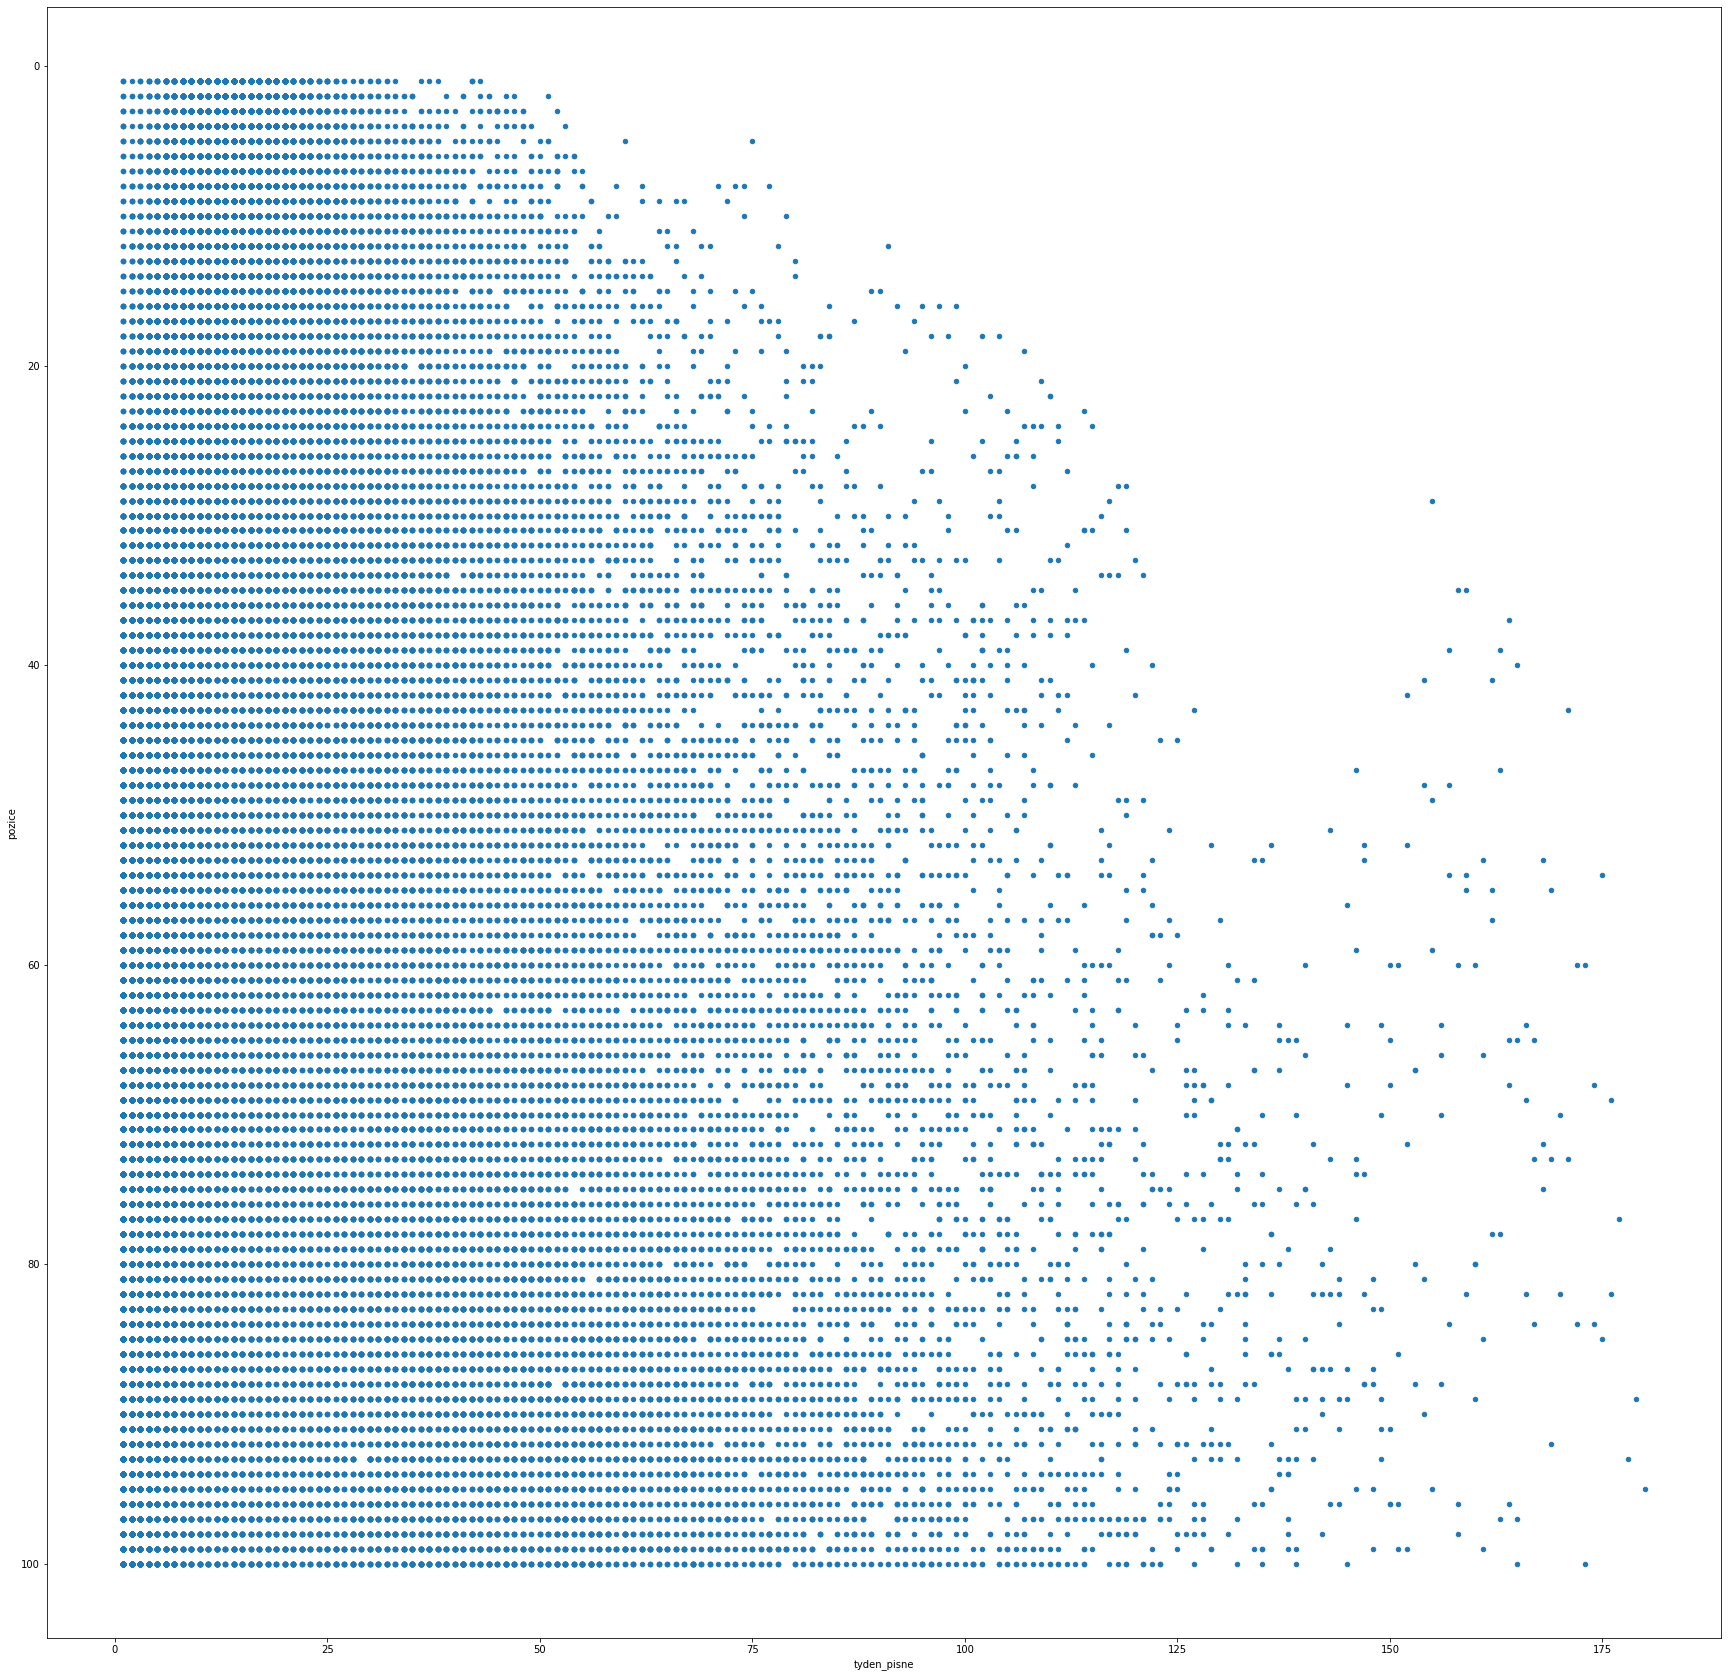

In [84]:
ax = df[['tyden_pisne','pozice']].plot.scatter(x='tyden_pisne',y='pozice',figsize=(30,30))
ax.invert_yaxis()

### Kolik týdnů v průměru trvalo jedničkám státi se jedničkou

<Axes: xlabel='rok'>

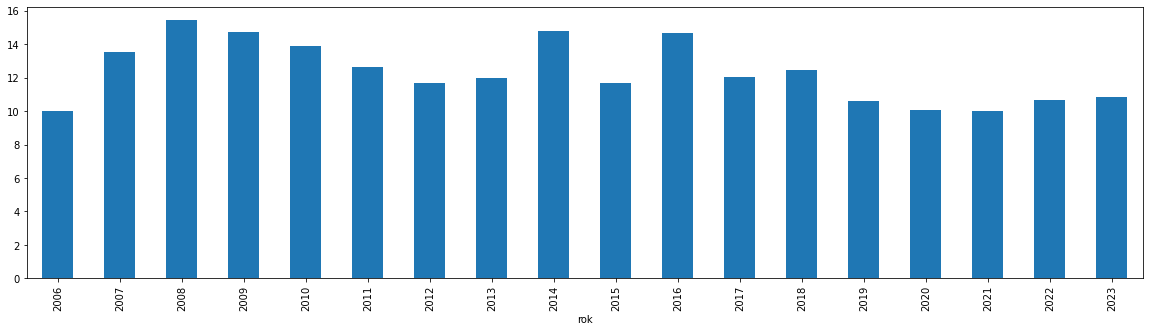

In [82]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track']).first().groupby('rok')['tyden_pisne'].mean().plot.bar(figsize=(20,5))

## Pozoruhodné tracky

### Ve kterém týdnu (ne od začátku vysílání, ale od prvního průniku do top 100!) se píseň stala #1 (Madonna neplatná, tou ta data začínají)

In [52]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].min().nsmallest(20)

interpret_hlavni    track                
Lewis Capaldi       Forget Me                1
Madonna             Hung Up                  1
Ofenbach            Katchi                   1
Chinaski            Láska a data             3
Miley Cyrus         Flowers                  3
Adele               Hello                    4
Juanes              La camisa negra          4
Support Lesbiens    English Stereo           4
Chinaski            Měl bych si boty zout    5
George Ezra         Shotgun                  5
Mirai               I přes to všechno        5
Adele               Skyfall                  6
Don Omar            Danza Kuduro             6
Ed Sheeran          Bad Habits               6
                    Shape of You             6
Gabry Ponte, Lum!X  Thunder                  6
James Blunt         Wisemen                  6
Kryštof             Vánoční                  6
Lewis Capaldi       Before You Go            6
Psy                 Gangnam Style            6
Name: tyden_pisne,

### Těmto to naopak trvalo:

In [53]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].min().nlargest(20)

interpret_hlavni  track                
Chinaski          Slovenský klín           36
Avicii            Without You              23
Morandi           Save Me                  23
September         Cry For You              23
Chinaski          Hlavolam                 22
Lenny Kravitz     I´ll Be Waiting          22
Coldplay          Paradise                 21
Pussycat Dolls    Hush Hush                21
Divokej Bill      Čmelák                   20
Flipsyde          Happy Birthday           20
Adele             Set Fire To The Rain     19
Alan Walker       Alone                    19
B.O.B.            Airplanes                19
Black Eyed Peas   Just Can´t Get Enough    19
Enrique Iglesias  Do You Know              19
Milky Chance      Stolen Dance             19
Sugababes         Denial                   19
Timbaland         If We Ever Meet Again    19
Verona            Hey Boy                  19
Charli Xcx        Boom Clap                18
Name: tyden_pisne, dtype: int64

### Nejpozdější top 1 (tentokrát i ty co byly top 1 dříve)

In [54]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni   track                     
Chinaski           Slovenský klín                43
Coldplay           Viva La Vida                  42
Mirai              Když nemůžeš, tak přidej      42
Ed Sheeran         Bad Habits                    33
Mirai              Vedle tebe usínám             32
Kryštof            Zůstaň tu se mnou (Za sny)    29
Sugababes          About You Now                 28
Alesha Dixon       Boy Does Nothing              27
Miley Cyrus        Flowers                       27
Nelly Furtado      Say It Right                  26
Edward Maya        Stereo Love                   25
The Weeknd         Blinding Lights               25
Katy Perry         Hot ´N´ Cold                  24
Kryštof            Cesta                         24
Peter Bič Project  Hey Now                       24
Avicii             Without You                   23
Elton John         Cold Heart (PNAU Remix)       23
Lenny Kravitz      I´ll Be Waiting               23
Mandrage          

### Držáci top 10

In [55]:
df[df['pozice'] <= 10].groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                   
Mirai             OTCHI                       79
Jelen             Ještě jednu noc             77
Michal Hrůza      Pro Emu                     74
Slza              Bouře                       67
O5                BRA3                        66
Mirai             Když nemůžeš, tak přidej    64
Kryštof           Co bude pak                 62
Mirai             I přes to všechno           62
Miley Cyrus       Angels Like You             60
Mirai             Vedle tebe usínám           56
Marek Ztracený    Naše cesty                  55
Alvaro Soler      Sofia                       53
Chinaski          Každý ráno                  52
                  Slovenský klín              52
Harry Styles      As it Was                   52
Kryštof           Ty a já                     52
Shawn Mendes      Senorita                    52
Sunrise Avenue    Hollywood Hills             52
Xindl X           V blbým věku                52
                  Cudzinka

### Držáci kdekoliv

In [56]:
df.groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                              
Karel Gott        Srdce nehasnou                         180
Mirai             Když nemůžeš, tak přidej               176
Mandrage          Motýli                                 169
Michal Hrůza      Pro Emu                                165
Marek Ztracený    Naše cesty                             150
Mirai             Chci tančit                            150
                  OTCHI                                  140
Slza              Na srdci (feat. Celeste Buckingham)    139
Chinaski          Láska a data                           138
Marek Ztracený    Tak se nezlob (Podpantoflák)           133
Kelly Clarkson    Stronger (What Doesn´t Kill You)       129
O5                BRA3                                   129
The Weeknd        Blinding Lights                        128
Kryštof           Hned teď (pojď být světlometem)        122
Shawn Mendes      Senorita                               122
Lewis Capaldi     Before You Go

## Grafy jednotlivých písní

In [76]:
def cesta_pisne(pisen, umelec):
    return df[(df['track'] == pisen) & (df['interpret_hlavni'] == umelec)].sort_values(by='week').set_index("week", drop=True)['pozice'].plot(figsize=(20,5)).invert_yaxis()

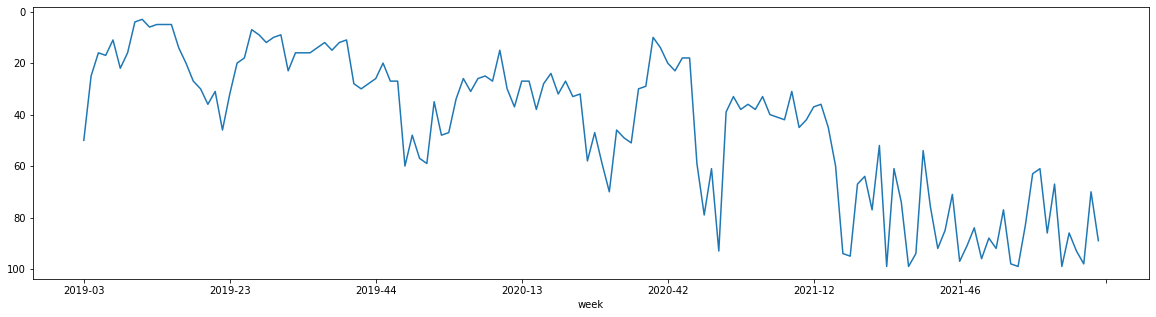

In [77]:
cesta_pisne('OTCHI','Mirai')

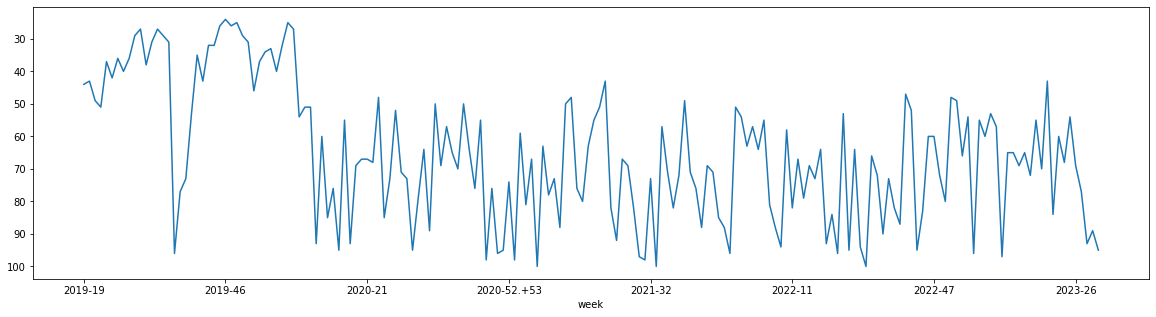

In [78]:
cesta_pisne('Srdce nehasnou','Karel Gott')

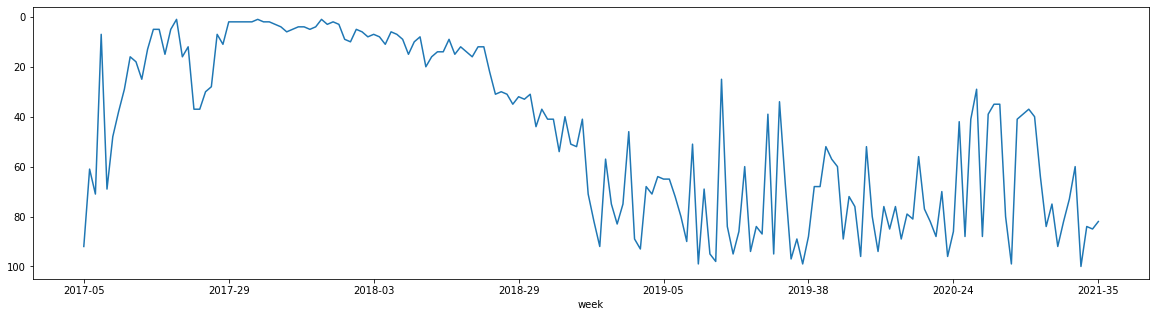

In [79]:
cesta_pisne('Když nemůžeš, tak přidej','Mirai')